# Machine Learning Final Project
## By: Brett Beaulieu
## Topic: Regression with Energy Efficiency.

Import all library used in the file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from math import sqrt

# Regression Dataset
## Exploration and Preprocessing

Load in the dataset from excel.

In [2]:
dataset = pd.read_excel('ENB2012_data.xlsx')
dataset = dataset[dataset.columns[:-2]]
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Change the column headers to their original names.

In [3]:
dataset.columns = ['Relative   Compactness', 'Surface   Area', 'Wall   Area', 'Roof   Area', 'Overall   Height'
                , 'Orientation', 'Glazing   Area', 'Glazing Area   Distribution', 'Heating Load', 'Cooling Load']
dataset.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Check for null values in the dataset.

In [4]:
dataset.isnull().sum()

Relative   Compactness         0
Surface   Area                 0
Wall   Area                    0
Roof   Area                    0
Overall   Height               0
Orientation                    0
Glazing   Area                 0
Glazing Area   Distribution    0
Heating Load                   0
Cooling Load                   0
dtype: int64

Visualize the data through histograms.

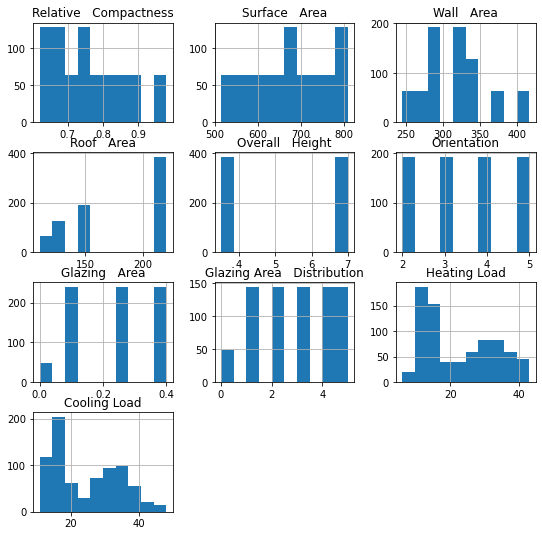

In [5]:
dataset.hist(figsize=(9,9))
plt.show()

Assign columns to their respective X and y. Heating and Cooling loads should be the y variable.

In [6]:
X = dataset.drop(['Heating Load','Cooling Load'], axis=1)
y = dataset[['Heating Load','Cooling Load']]
X

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


Split up the training and testing set with a test size of 0.33.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Normalize the training and testing data.

In [8]:
nr = Normalizer(copy=False)
X_train_norm = nr.fit_transform(X_train)
X_test_norm = nr.fit_transform(X_test)

## Linear Regression

Perform Linear Regression on the dataset.

In [9]:
lr = LinearRegression(normalize=True)
lr.fit(X_train_norm,y_train)

LinearRegression(normalize=True)

Using the Linear Regression model predict values based off the test data.

In [10]:
y_pred = lr.predict(X_test_norm)
y_pred

array([[18.37424611, 19.66773346],
       [13.71799611, 16.44898346],
       [32.03049611, 32.48023346],
       [35.74924611, 36.63648346],
       [15.15549611, 17.35523346],
       [28.31174611, 30.82398346],
       [24.12424611, 27.01148346],
       [27.96799611, 29.60523346],
       [17.12424611, 18.91773346],
       [27.24924611, 29.57398346],
       [17.43674611, 19.29273346],
       [34.74924611, 35.82398346],
       [27.31174611, 29.98023346],
       [ 8.96799611, 12.49585846],
       [18.06174611, 19.07398346],
       [37.09299611, 37.73023346],
       [37.78049611, 38.01148346],
       [11.70237111, 14.54273346],
       [15.07737111, 17.16773346],
       [34.65549611, 35.88648346],
       [34.43674611, 35.44898346],
       [35.03049611, 36.16773346],
       [11.03049611, 14.69898346],
       [29.68674611, 31.88648346],
       [12.84299611, 15.51148346],
       [29.62424611, 32.07398346],
       [33.74924611, 34.60523346],
       [34.31174611, 35.82398346],
       [14.53049611,

Output the error scores and scores of the Linear Regression predicition.

In [11]:
print('Mean Absolute Error', str(mean_absolute_error(y_test, y_pred)).rjust(30))
print('Root Mean Squared Error', str(sqrt(mean_squared_error(y_test, y_pred))).rjust(25))
print('Mean Squared Absolute Error',str(mean_squared_error(y_test, y_pred)).rjust(20))
print('R2 Score', str(r2_score(y_test, y_pred)).rjust(41))

Mean Absolute Error             2.1419015824626975
Root Mean Squared Error         3.064763987733124
Mean Squared Absolute Error     9.39277830050584
R2 Score                        0.9036148603886349


Plot a graph of the predicted Linear Regression data for Heating Load vs the real test data.

Text(0, 0.5, 'Predicted Values')

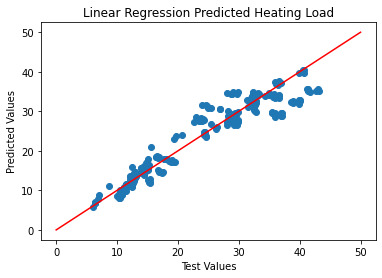

In [12]:
plt.scatter(y_test.iloc[:,0], y_pred[:,0])
plt.plot([0,50], [0, 50],"r-")
plt.title('Linear Regression Predicted Heating Load')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

Plot a graph of the predicted Linear Regression data for Cooling Load vs the real test data.

Text(0, 0.5, 'Predicted Values')

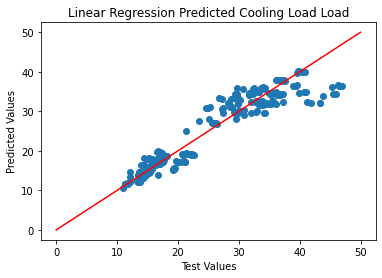

In [13]:
plt.scatter(y_test.iloc[:,1], y_pred[:,1])
plt.plot([0,50], [0, 50],"r-")
plt.title('Linear Regression Predicted Cooling Load Load')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

## Ridge Regression

Perform Ridge Regression on the normalized data.

In [14]:
ridge_reg = Ridge(alpha=0.2)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.2)

Predict the target elements basae on the testing data.

In [15]:
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_ridge

array([[19.5807136 , 20.50538015],
       [13.82020669, 16.47584962],
       [31.76753812, 32.46170392],
       [35.70669872, 36.5528955 ],
       [15.722287  , 17.67189224],
       [28.63857479, 31.09305205],
       [25.59483348, 28.25551284],
       [28.56962092, 30.27529177],
       [17.90176306, 19.47597074],
       [27.67519609, 29.96023556],
       [18.30604857, 19.90397025],
       [33.36148488, 34.50903725],
       [27.81437781, 30.31633492],
       [ 8.18420115, 11.77535555],
       [18.96217822, 19.76357132],
       [35.76409071, 36.47974896],
       [36.51742806, 36.79018247],
       [10.85191077, 13.81796741],
       [14.58293578, 16.73529935],
       [33.31951086, 34.60377032],
       [34.23909782, 35.25017591],
       [34.99533539, 36.14772892],
       [10.80344523, 14.55080376],
       [29.92501994, 32.13440535],
       [13.05457738, 15.62928038],
       [29.88304592, 32.22913842],
       [33.2337451 , 34.21209249],
       [34.11317575, 35.53437513],
       [14.96894965,

Output the error scores and scores of the Ridge Regression predicition.

In [16]:
print('Mean Absolute Error', str(mean_absolute_error(y_test, y_pred_ridge)).rjust(30))
print('Root Mean Squared Error', str(sqrt(mean_squared_error(y_test, y_pred_ridge))).rjust(25))
print('Mean Squared Absolute Error',str(mean_squared_error(y_test, y_pred_ridge)).rjust(21))
print('R2 Score', str(r2_score(y_test, y_pred_ridge)).rjust(41))

Mean Absolute Error             2.2628656618312797
Root Mean Squared Error         3.130251468619064
Mean Squared Absolute Error     9.798474256791806
R2 Score                        0.8995346011629067


Plot a graph of the predicted Ridge Regression data for Heating Load vs the real test data.

Text(0, 0.5, 'Predicted Values')

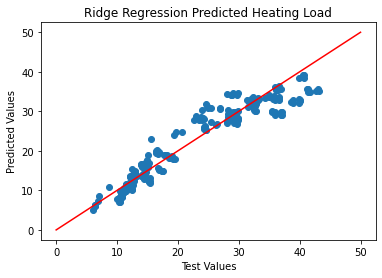

In [17]:
plt.scatter(y_test.iloc[:,0], y_pred_ridge[:,0])
plt.plot([0,50], [0, 50],"r-")
plt.title('Ridge Regression Predicted Heating Load')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

Plot a graph of the predicted Rdige Regression data for Cooling Load vs the real test data.

Text(0, 0.5, 'Predicted Values')

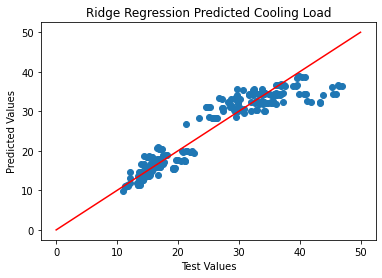

In [18]:
plt.scatter(y_test.iloc[:,1], y_pred_ridge[:,1])
plt.plot([0,50], [0, 50],"r-")
plt.title('Ridge Regression Predicted Cooling Load')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

## Lasso Regression

Perform Lasso Regression on the normalized data.

In [19]:
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.2)

Predict the target elements based on the testing data.

In [20]:
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_lasso

array([[18.05086054, 19.19248427],
       [13.49281914, 16.33850139],
       [31.02031791, 31.92330173],
       [33.23124127, 33.98456156],
       [15.87402926, 17.90830114],
       [29.39937251, 32.07206987],
       [28.08212622, 30.84946965],
       [29.36528043, 31.29499317],
       [16.04153368, 17.80546956],
       [29.4888763 , 31.99889449],
       [16.78530021, 18.17103963],
       [34.9230009 , 36.2674581 ],
       [29.86075956, 32.18167953],
       [ 9.90051697, 13.55978409],
       [17.52906673, 18.5366097 ],
       [35.46238859, 36.34741155],
       [36.57803838, 36.89576666],
       [10.81178792, 13.82252257],
       [12.61673594, 14.92392067],
       [34.9230009 , 36.2674581 ],
       [31.59379767, 32.78033188],
       [32.11559148, 33.43620645],
       [12.20966492, 15.89297787],
       [30.66493285, 33.09351451],
       [14.96275831, 17.64556265],
       [30.66493285, 33.09351451],
       [31.68330146, 32.70715651],
       [31.59379767, 32.78033188],
       [14.75837947,

In [21]:
print('Mean Absolute Error', str(mean_absolute_error(y_test, y_pred_lasso)).rjust(30))
print('Root Mean Squared Error', str(sqrt(mean_squared_error(y_test, y_pred_lasso))).rjust(26))
print('Mean Squared Absolute Error',str(mean_squared_error(y_test, y_pred_lasso)).rjust(22))
print('R2 Score', str(r2_score(y_test, y_pred_lasso)).rjust(41))

Mean Absolute Error             2.6244742250819693
Root Mean Squared Error           3.55975563075367
Mean Squared Absolute Error     12.671860150682459
R2 Score                        0.8700113674552772


Plot a graph of the predicted Lasso Regression data for Heating Load vs the real test data.

Text(0, 0.5, 'Predicted Values')

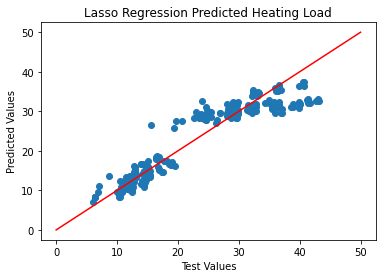

In [22]:
plt.scatter(y_test.iloc[:,0], y_pred_lasso[:,0])
plt.plot([0,50], [0, 50],"r-")
plt.title('Lasso Regression Predicted Heating Load')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

Plot a graph of the predicted Lasso Regression data for Cooling Load vs the real test data.

Text(0, 0.5, 'Predicted Values')

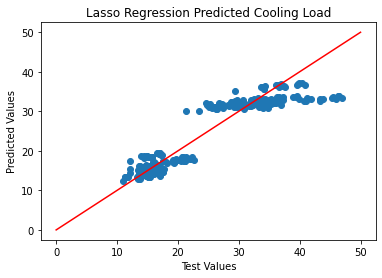

In [23]:
plt.scatter(y_test.iloc[:,1], y_pred_lasso[:,1])
plt.plot([0,50], [0, 50],"r-")
plt.title('Lasso Regression Predicted Cooling Load')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

Text(0, 0.5, 'R2 Score')

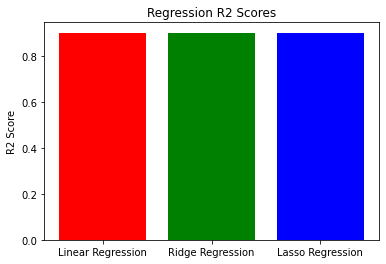

In [24]:
r2_linear=r2_score(y_test, y_pred)
r2_ridge=r2_score(y_test, y_pred_ridge)
r2_lasso=r2_score(y_test, y_pred_lasso)
r2=[r2_linear,r2_linear,r2_linear]
plt.bar(['Linear Regression','Ridge Regression', 'Lasso Regression'], r2,color=['red','green','blue'])
plt.title('Regression R2 Scores')
plt.ylabel('R2 Score')